In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.integrate import simps
from numpy import trapz
import math

def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [2]:
HMC1 = pd.read_csv('HMC Expirement 1.csv')
HMC1 = HMC1.drop(range(0,50))

HMC2 = pd.read_csv('HMC Expirement 2.csv')
HMC2 = HMC2.drop(range(0,45))

HMC3 = pd.read_csv('HMC Expirement 3.csv')
HMC3 = HMC3.drop(range(0,30))

OR5B = pd.read_csv('OR 5 Blocked.csv')
OR5B = OR5B.drop(range(0,50))

OR5UB = pd.read_csv('OR 5 Unblocked.csv')
OR5UB = OR5UB.drop(range(0,50))

OR12B = pd.read_csv('OR 12 Blocked.csv')
OR12B = OR12B.drop(range(0,60))

OR12UB = pd.read_csv('OR 12 Unblocked.csv')
OR12UB = OR12UB.drop(range(0,60))

OR7B = pd.read_csv('OR7 Blocked.csv')
OR7B = OR7B.drop(range(0,60))

OR7UB = pd.read_csv('OR7 Unblocked.csv')
OR7UB = OR7UB.drop(range(0,60))

OR16B1 = pd.read_csv('OR16 Blocked 1.csv')
OR16B1 = OR16B1.drop(range(0,50))

OR16B2 = pd.read_csv('OR16 Blocked 2.csv')
OR16B2 = OR16B2.drop(range(0,40))

OR16UB = pd.read_csv('OR16 Unblocked.csv')
OR16UB = OR16UB.drop(range(0,37))

In [3]:
HMC1.head()

,B-01,B-02,B-04,B-05,B-06,B-07,B-08,B-09,B-10,B-11,...,B-19,B-20,B-21,B-22,B-23,Average,Variance,Zone 1,Zone 2,Zone 3
50,11.0,0.0,0.0,4.5,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,4.50,7.659091,1135.720041,1.428571,29.70,0.0
51,9.9,0.0,0.0,4.5,0.0,0.0,0.0,0.45,2.7,0.0,...,0.0,0.0,0.0,0.0,4.05,7.743182,1142.244731,1.542857,29.75,0.0
52,8.8,0.0,0.0,4.5,0.0,0.0,0.0,0.90,5.4,0.0,...,0.0,0.0,0.0,0.0,3.60,7.827273,1148.769421,1.657143,29.80,0.0
53,7.7,0.0,0.0,4.5,0.0,0.0,0.0,1.35,8.1,0.0,...,0.0,0.0,0.0,0.0,3.15,7.911364,1155.294112,1.771429,29.85,0.0
54,6.6,0.0,0.0,4.5,0.0,0.0,0.0,1.80,10.8,0.0,...,0.0,0.0,0.0,0.0,2.70,7.995455,1161.818802,1.885714,29.90,0.0


In [4]:
## Only run this cell once
HMC1.insert(0, "Time", np.arange(0, 481, 1), True)

HMC2.insert(0, "Time", np.arange(0, 486, 1), True)

HMC3.insert(0, "Time", np.arange(0, 861, 1), True)

OR5B.insert(0, "Time", np.arange(0, 301, 1), True)

OR5UB.insert(0, "Time", np.arange(0, 301, 1), True)

OR12B.insert(0, "Time", np.arange(0, 411, 1), True)

OR12UB.insert(0, "Time", np.arange(0, 471, 1), True)

OR7B.insert(0, "Time", np.arange(0, 291, 1), True)

OR7UB.insert(0, "Time", np.arange(0, 291, 1), True)

OR16B1.insert(0, "Time", np.arange(0, 301, 1), True)

OR16B2.insert(0, "Time", np.arange(0, 311, 1), True)

OR16UB.insert(0, "Time", np.arange(0, 314, 1), True)

## For 3 Zones

In [5]:
HMC1['Zone 1'] = HMC1[['B-01', 'B-02', 'B-04', 'B-05', 'B-06', 'B-07', 'B-09', 'B-10', 'B-11', 'B-14', 'B-16', 'B-20', 'B-22', 'B-23']].mean(axis=1)
HMC1['Zone 2'] = HMC1[['B-08', 'B-12', 'B-13', 'B-15', 'B-19']].mean(axis=1)
HMC1['Zone 3'] = HMC1[['B-17', 'B-18', 'B-21']].mean(axis=1)
HMC1['Indoor Average'] = HMC1[['B-01', 'B-02', 'B-04', 'B-05', 'B-06', 'B-07', 'B-09', 'B-10', 'B-11', 'B-14', 'B-16', 'B-20', 'B-22', 'B-23', 'B-08', 'B-12', 'B-13', 'B-15', 'B-19', 'B-17', 'B-18', 'B-21']].mean(axis=1)


HMC2['Zone 1'] = HMC2[['B-01', 'B-02', 'B-04', 'B-05', 'B-06', 'B-07', 'B-10', 'B-11', 'B-13', 'B-14', 'B-20', 'B-23']].mean(axis=1)
HMC2['Zone 2'] = HMC2[['B-08', 'B-15', 'B-18', 'B-22']].mean(axis=1)
HMC2['Zone 3'] = HMC2[['B-09', 'B-12', 'B-16', 'B-17', 'B-19', 'B-21']].mean(axis=1)
HMC2['Indoor Average'] = HMC2[['B-01', 'B-02', 'B-04', 'B-05', 'B-06', 'B-07', 'B-09', 'B-10', 'B-11', 'B-14', 'B-16', 'B-20', 'B-22', 'B-23', 'B-08', 'B-12', 'B-13', 'B-15', 'B-19', 'B-17', 'B-18', 'B-21']].mean(axis=1)


HMC3['Zone 1'] = HMC3[['B-01', 'B-05', 'B-07', 'B-10', 'B-11', 'B-15']].mean(axis=1)
HMC3['Zone 2'] = HMC3[['B-02', 'B-04', 'B-06', 'B-08', 'B-09', 'B-13', 'B-15', 'B-18', 'B-20', 'B-23']].mean(axis=1)
HMC3['Zone 3'] = HMC3[['B-12', 'B-16', 'B-17', 'B-19', 'B-21', 'B-22']].mean(axis=1)
HMC3['Indoor Average'] = HMC3[['B-01', 'B-02', 'B-04', 'B-05', 'B-06', 'B-07', 'B-09', 'B-10', 'B-11', 'B-14', 'B-16', 'B-20', 'B-22', 'B-23', 'B-08', 'B-12', 'B-13', 'B-15', 'B-19', 'B-17', 'B-18', 'B-21']].mean(axis=1)


OR5B['Zone 1'] = OR5B[['S-01', 'S-02', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-11', 'S-12', 'S-13', 'S-14']].mean(axis=1)
OR5B['Zone 2'] = OR5B[['S-03', 'S-09', 'S-10', 'S-15']].mean(axis=1)
OR5B['Zone 3'] = OR5B[['S-16', 'S-18', 'S-19']].mean(axis=1)
OR5B['Indoor Average'] = OR5B[['S-01', 'S-02', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-11', 'S-12', 'S-13', 'S-14', 'S-03', 'S-09', 'S-10', 'S-16']].mean(axis=1)


OR5UB['Zone 1'] = OR5UB[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-12', 'S-13', 'S-14', 'S-15']].mean(axis=1)
OR5UB['Zone 2'] = OR5UB[['S-02', 'S-10', 'S-11']].mean(axis=1)
OR5UB['Zone 3'] = OR5UB[['S-16', 'S-18', 'S-19']].mean(axis=1)
OR5UB['Indoor Average'] = OR5UB[['S-01', 'S-02', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-11', 'S-12', 'S-13', 'S-14', 'S-03', 'S-09', 'S-10', 'S-16']].mean(axis=1)


OR12B['Zone 1'] = OR12B[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-07', 'S-13', 'S-14']].mean(axis=1)
OR12B['Zone 2'] = OR12B[['S-16', 'S-18', 'S-19']].mean(axis=1)
OR12B['Zone 3'] = OR12B[['S-06', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-15']].mean(axis=1)
OR12B['Indoor Average'] = OR12B[['S-01', 'S-02', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-11', 'S-12', 'S-13', 'S-14', 'S-03', 'S-09', 'S-10', 'S-16']].mean(axis=1)


OR12UB['Zone 1'] = OR12UB[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-12', 'S-13', 'S-14', 'S-15']].mean(axis=1)
OR12UB['Zone 2'] = OR12UB[['S-16', 'S-18', 'S-19']].mean(axis=1)
OR12UB['Zone 3'] = OR12UB[['S-09', 'S-10', 'S-11']].mean(axis=1)
OR12UB['Indoor Average'] = OR12UB[['S-01', 'S-02', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-11', 'S-12', 'S-13', 'S-14', 'S-03', 'S-09', 'S-10', 'S-16']].mean(axis=1)


OR7B['Zone 1'] = OR7B[['S-09', 'S-12', 'S-13', 'S-14', 'S-15', 'S-BU1']].mean(axis=1)
OR7B['Zone 2'] = OR7B[['S-03', 'S-04', 'S-06', 'S-07', 'S-11']].mean(axis=1)
OR7B['Zone 3'] = OR7B[['S-01', 'S-05']].mean(axis=1)
OR7B['Indoor Average'] = OR7B[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-09', 'S-11', 'S-12', 'S-13', 'S-14', 'S-15']].mean(axis=1)


OR7UB['Zone 1'] = OR7UB[['S-06', 'S-07', 'S-09', 'S-12', 'S-13', 'S-14', 'S-15', 'S-BU1']].mean(axis=1)
OR7UB['Zone 2'] = OR7UB[['S-01', 'S-04', 'S-05', 'S-11']].mean(axis=1)
OR7UB['Zone 3'] = OR7UB[['S-03', 'S-08']].mean(axis=1)
OR7UB['Indoor Average'] = OR7UB[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-09', 'S-11', 'S-12', 'S-13', 'S-14', 'S-15']].mean(axis=1)


OR16B1['Zone 1'] = OR16B1[['S-11', 'S-12', 'S-13', 'S-14']].mean(axis=1)
OR16B1['Zone 2'] = OR16B1[['S-01', 'S-04', 'S-05', 'S-07', 'S-09', 'S-BU1']].mean(axis=1)
OR16B1['Zone 3'] = OR16B1[['S-03', 'S-06', 'S-15']].mean(axis=1)
OR16B1['Indoor Average'] = OR16B1[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-09', 'S-11', 'S-12', 'S-13', 'S-14', 'S-15']].mean(axis=1)


OR16B2['Zone 1'] = OR16B2[['S-05', 'S-09', 'S-12', 'S-13', 'S-14']].mean(axis=1)
OR16B2['Zone 2'] = OR16B2[['S-01', 'S-04', 'S-06', 'S-07', 'S-11']].mean(axis=1)
OR16B2['Zone 3'] = OR16B2[['S-03', 'S-08', 'S-15', 'S-BU1']].mean(axis=1)
OR16B2['Indoor Average'] = OR16B2[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-09', 'S-11', 'S-12', 'S-13', 'S-14', 'S-15']].mean(axis=1)


OR16UB['Zone 1'] = OR16UB[['S-05', 'S-11', 'S-12', 'S-13', 'S-14']].mean(axis=1)
OR16UB['Zone 2'] = OR16UB[['S-01', 'S-04', 'S-06', 'S-07', 'S-09']].mean(axis=1)
OR16UB['Zone 3'] = OR16UB[['S-03', 'S-08', 'S-15', 'S-BU1']].mean(axis=1)
OR16UB['Indoor Average'] = OR16UB[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-09', 'S-11', 'S-12', 'S-13', 'S-14', 'S-15']].mean(axis=1)


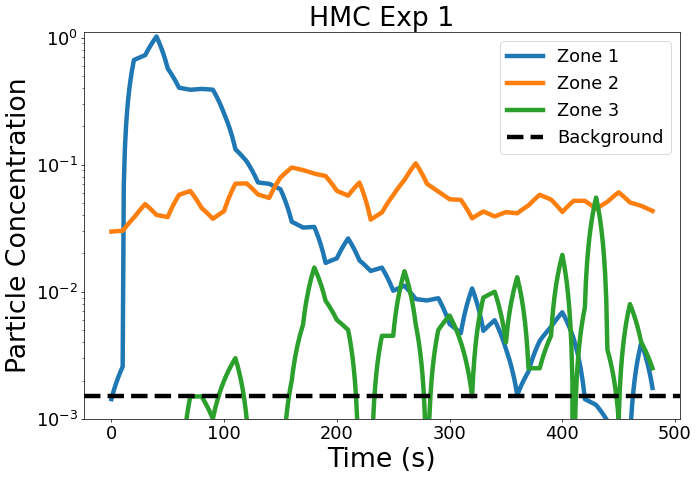

In [6]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(HMC1['Time'], HMC1['Zone 1']/(100*10), linewidth=5.0)
plt.semilogy(HMC1['Time'], HMC1['Zone 2']/(100*10), linewidth=5.0)
plt.semilogy(HMC1['Time'], HMC1['Zone 3']/(100*10), linewidth=5.0)
plt.title('HMC Exp 1').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.001, 1.1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0015, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# # Compute the area using the composite Simpson's rule.
# Zone_1 = simps(HMC1['Zone 1']/(100*110) - 0.0065, dx=0.01)
# #print("area 1 =", area_1)

# Zone_2 = simps(HMC1['Zone 2']/(100*110) - 0.0065, dx=0.01)
# #print("area 2 =", area_2)

# Zone_3 = simps(HMC1['Zone 3']/(100*110) - 0.0065, dx=0.01)
# #print("area 3 =", area_3)




# inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
# #print("Inside =", inside)

# door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
# #print("Door Sensors =", door_sensors)

# nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
# #print("Nurse's Station =", nurses_station)

# total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
# #print("Total Average =", total_average)

# print("Inside =", inside/total_average)
# print("Door Sensors =", door_sensors/total_average)
# print("Nurse's Station =", nurses_station/total_average)
# print("Outside =", Zone_3/total_average)

[-0.01860793 -0.04415956]


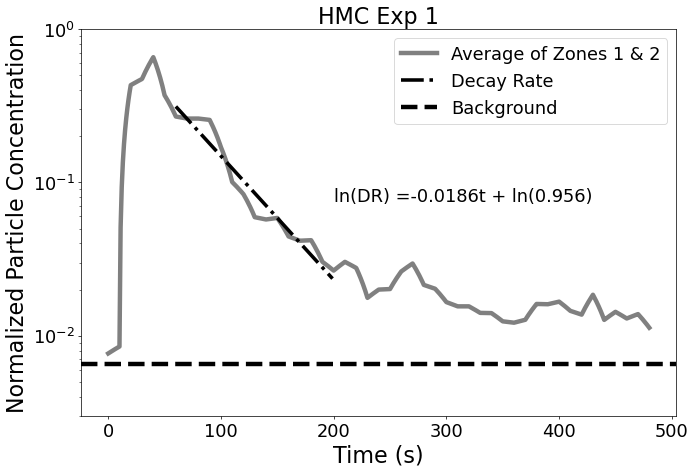

In [7]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(HMC1['Time'], HMC1['Indoor Average']/(100*10), linewidth = 5, color='gray', linestyle = '-')
plt.title('HMC Exp 1').set_size(25)
plt.xlabel('Time (s)').set_size(25)
plt.ylabel('Normalized Particle Concentration').set_size(25)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.003, 1])

log_y_data = np.log(HMC1['Indoor Average']/(100*10))

time = HMC1['Time'][60:200]
y_data = log_y_data[60:200]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)
(t,yd) = (curve_fit)
t_text = str(truncate(t,4))
yd_text = str(truncate(math.exp(yd),3))


y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.0065, color='black', linestyle='--', linewidth=5.0)

text = ('ln(DR) =' + t_text + 't' + ' + ' +  'ln(' + yd_text + ')')

plt.text(200, 0.075, text, fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

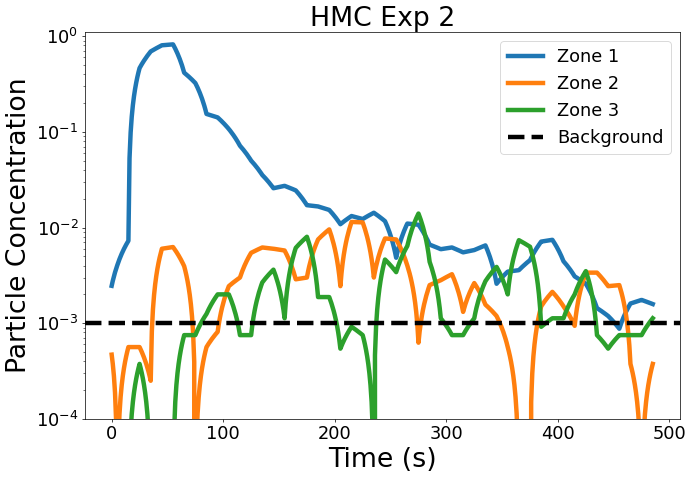

In [8]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(HMC2['Time'], HMC2['Zone 1']/(100*20), linewidth=5.0)
plt.semilogy(HMC2['Time'], HMC2['Zone 2']/(100*20), linewidth=5.0)
plt.semilogy(HMC2['Time'], HMC2['Zone 3']/(100*20), linewidth=5.0)
plt.title('HMC Exp 2').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.0001, 1.1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.001, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# # Compute the area using the composite Simpson's rule.
# Zone_1 = simps(HMC1['Zone 1']/(100*110) - 0.0065, dx=0.01)
# #print("area 1 =", area_1)

# Zone_2 = simps(HMC1['Zone 2']/(100*110) - 0.0065, dx=0.01)
# #print("area 2 =", area_2)

# Zone_3 = simps(HMC1['Zone 3']/(100*110) - 0.0065, dx=0.01)
# #print("area 3 =", area_3)




# inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
# #print("Inside =", inside)

# door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
# #print("Door Sensors =", door_sensors)

# nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
# #print("Nurse's Station =", nurses_station)

# total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
# #print("Total Average =", total_average)

# print("Inside =", inside/total_average)
# print("Door Sensors =", door_sensors/total_average)
# print("Nurse's Station =", nurses_station/total_average)
# print("Outside =", Zone_3/total_average)

[-0.00839825 -2.12402659]


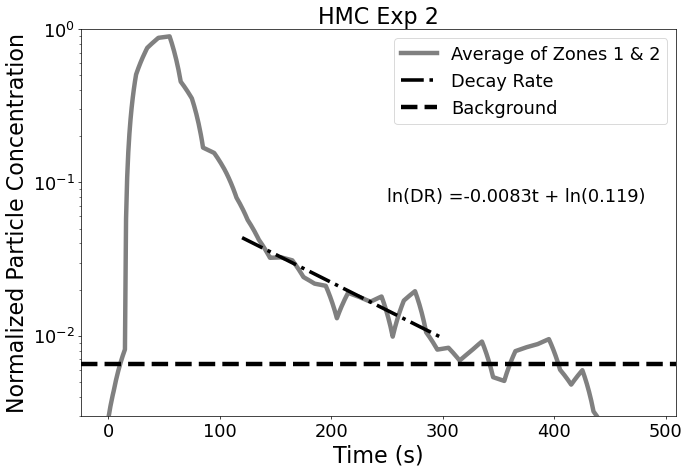

In [9]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(HMC2['Time'], HMC2['Indoor Average']/(100*10), linewidth = 5, color='gray', linestyle = '-')
plt.title('HMC Exp 2').set_size(25)
plt.xlabel('Time (s)').set_size(25)
plt.ylabel('Normalized Particle Concentration').set_size(25)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.003, 1])

log_y_data = np.log(HMC2['Indoor Average']/(100*10))

time = HMC2['Time'][120:300]
y_data = log_y_data[120:300]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)
(t,yd) = (curve_fit)
t_text = str(truncate(t,4))
yd_text = str(truncate(math.exp(yd),3))


y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.0065, color='black', linestyle='--', linewidth=5.0)

text = ('ln(DR) =' + t_text + 't' + ' + ' +  'ln(' + yd_text + ')')

plt.text(250, 0.075, text, fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

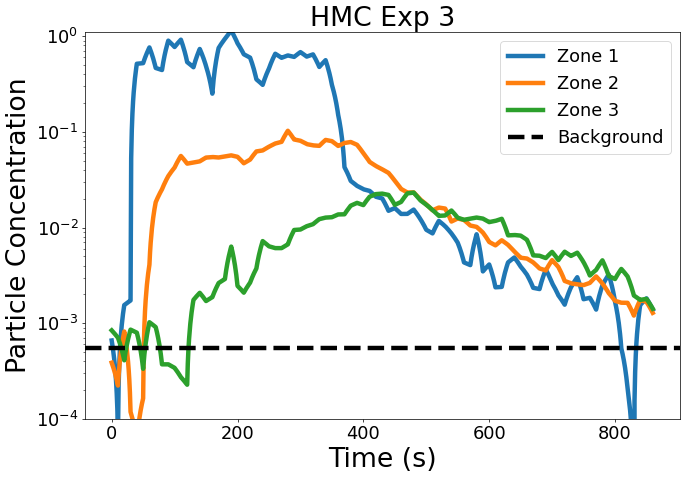

In [10]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(HMC3['Time'], HMC3['Zone 1']/(100*55), linewidth=5.0)
plt.semilogy(HMC3['Time'], HMC3['Zone 2']/(100*55), linewidth=5.0)
plt.semilogy(HMC3['Time'], HMC3['Zone 3']/(100*55), linewidth=5.0)
plt.title('HMC Exp 3').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.0001, 1.1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.00055, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# # Compute the area using the composite Simpson's rule.
# Zone_1 = simps(HMC1['Zone 1']/(100*110) - 0.0065, dx=0.01)
# #print("area 1 =", area_1)

# Zone_2 = simps(HMC1['Zone 2']/(100*110) - 0.0065, dx=0.01)
# #print("area 2 =", area_2)

# Zone_3 = simps(HMC1['Zone 3']/(100*110) - 0.0065, dx=0.01)
# #print("area 3 =", area_3)




# inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
# #print("Inside =", inside)

# door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
# #print("Door Sensors =", door_sensors)

# nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
# #print("Nurse's Station =", nurses_station)

# total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
# #print("Total Average =", total_average)

# print("Inside =", inside/total_average)
# print("Door Sensors =", door_sensors/total_average)
# print("Nurse's Station =", nurses_station/total_average)
# print("Outside =", Zone_3/total_average)

[-0.00728849 -0.4635225 ]


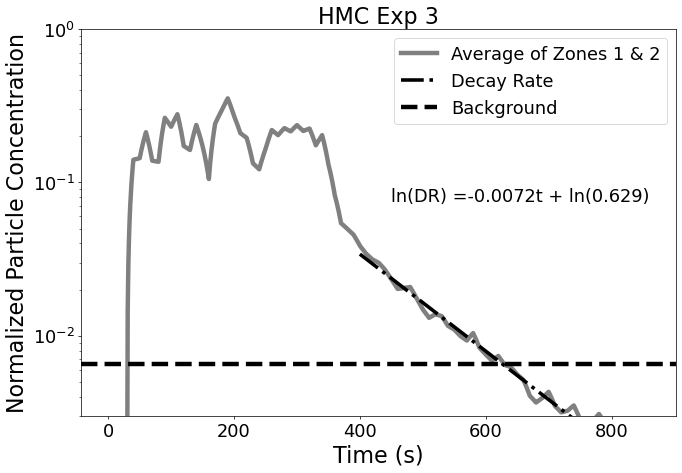

In [11]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(HMC3['Time'], HMC3['Indoor Average']/(100*55), linewidth = 5, color='gray', linestyle = '-')
plt.title('HMC Exp 3').set_size(25)
plt.xlabel('Time (s)').set_size(25)
plt.ylabel('Normalized Particle Concentration').set_size(25)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.003, 1])

log_y_data = np.log(HMC3['Indoor Average']/(100*55))

time = HMC3['Time'][400:760]
y_data = log_y_data[400:760]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)
(t,yd) = (curve_fit)
t_text = str(truncate(t,4))
yd_text = str(truncate(math.exp(yd),3))


y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.0065, color='black', linestyle='--', linewidth=5.0)

text = ('ln(DR) =' + t_text + 't' + ' + ' +  'ln(' + yd_text + ')')

plt.text(450, 0.075, text, fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

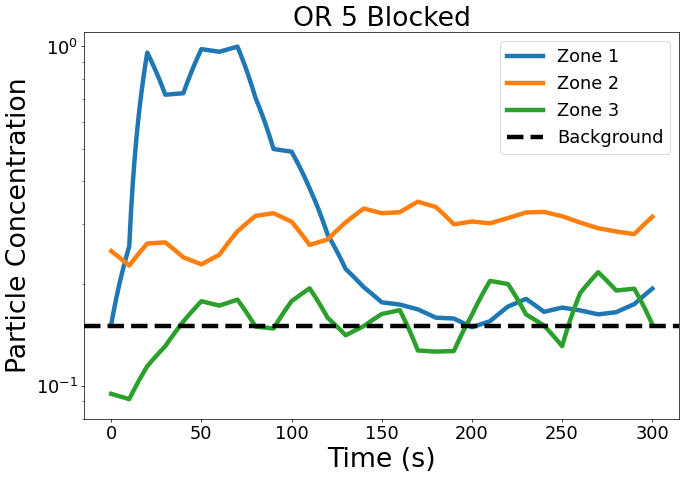

In [12]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR5B['Time'], OR5B['Zone 1']/(100*7), linewidth=5.0)
plt.semilogy(OR5B['Time'], OR5B['Zone 2']/(100*7), linewidth=5.0)
plt.semilogy(OR5B['Time'], OR5B['Zone 3']/(100*7), linewidth=5.0)
plt.title('OR 5 Blocked').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.08, 1.1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.15, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# # Compute the area using the composite Simpson's rule.
# Zone_1 = simps(HMC1['Zone 1']/(100*110) - 0.0065, dx=0.01)
# #print("area 1 =", area_1)

# Zone_2 = simps(HMC1['Zone 2']/(100*110) - 0.0065, dx=0.01)
# #print("area 2 =", area_2)

# Zone_3 = simps(HMC1['Zone 3']/(100*110) - 0.0065, dx=0.01)
# #print("area 3 =", area_3)




# inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
# #print("Inside =", inside)

# door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
# #print("Door Sensors =", door_sensors)

# nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
# #print("Nurse's Station =", nurses_station)

# total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
# #print("Total Average =", total_average)

# print("Inside =", inside/total_average)
# print("Door Sensors =", door_sensors/total_average)
# print("Nurse's Station =", nurses_station/total_average)
# print("Outside =", Zone_3/total_average)

[-0.01716526  0.83788702]


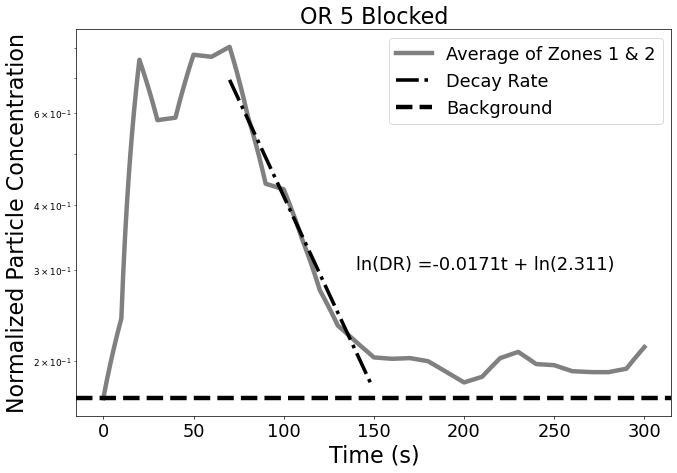

In [13]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR5B['Time'], OR5B['Indoor Average']/(100*7), linewidth = 5, color='gray', linestyle = '-')
plt.title('OR 5 Blocked').set_size(25)
plt.xlabel('Time (s)').set_size(25)
plt.ylabel('Normalized Particle Concentration').set_size(25)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
#plt.ylim([0.1, 1])

log_y_data = np.log(OR5B['Indoor Average']/(100*7))

time = OR5B['Time'][70:150]
y_data = log_y_data[70:150]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)
(t,yd) = (curve_fit)
t_text = str(truncate(t,4))
yd_text = str(truncate(math.exp(yd),3))


y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.17, color='black', linestyle='--', linewidth=5.0)

text = ('ln(DR) =' + t_text + 't' + ' + ' +  'ln(' + yd_text + ')')

plt.text(140, 0.3, text, fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

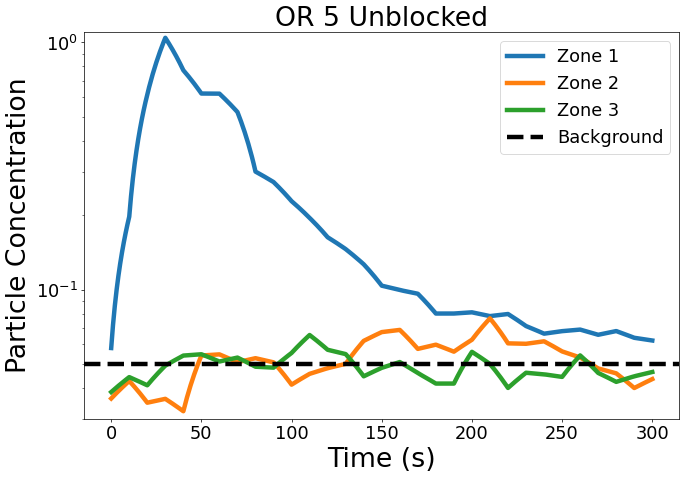

In [14]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR5UB['Time'], OR5UB['Zone 1']/(100*20), linewidth=5.0)
plt.semilogy(OR5UB['Time'], OR5UB['Zone 2']/(100*20), linewidth=5.0)
plt.semilogy(OR5UB['Time'], OR5UB['Zone 3']/(100*20), linewidth=5.0)
plt.title('OR 5 Unblocked').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.03, 1.1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.05, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# # Compute the area using the composite Simpson's rule.
# Zone_1 = simps(HMC1['Zone 1']/(100*110) - 0.0065, dx=0.01)
# #print("area 1 =", area_1)

# Zone_2 = simps(HMC1['Zone 2']/(100*110) - 0.0065, dx=0.01)
# #print("area 2 =", area_2)

# Zone_3 = simps(HMC1['Zone 3']/(100*110) - 0.0065, dx=0.01)
# #print("area 3 =", area_3)




# inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
# #print("Inside =", inside)

# door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
# #print("Door Sensors =", door_sensors)

# nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
# #print("Nurse's Station =", nurses_station)

# total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
# #print("Total Average =", total_average)

# print("Inside =", inside/total_average)
# print("Door Sensors =", door_sensors/total_average)
# print("Nurse's Station =", nurses_station/total_average)
# print("Outside =", Zone_3/total_average)

[-0.01502579 -0.05207227]


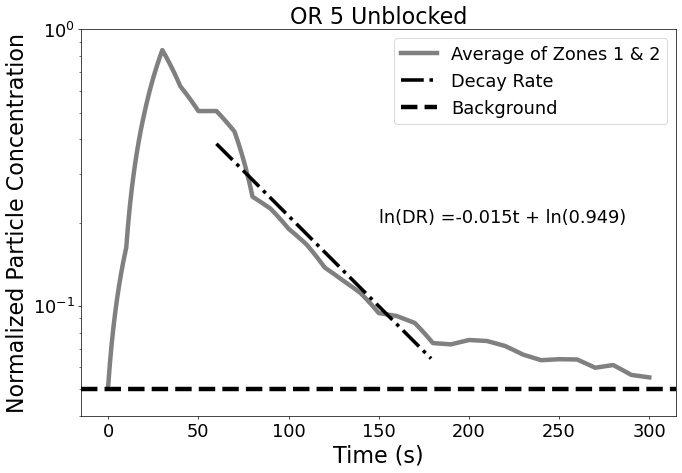

In [15]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR5UB['Time'], OR5UB['Indoor Average']/(100*20), linewidth = 5, color='gray', linestyle = '-')
plt.title('OR 5 Unblocked').set_size(25)
plt.xlabel('Time (s)').set_size(25)
plt.ylabel('Normalized Particle Concentration').set_size(25)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.04, 1])

log_y_data = np.log(OR5UB['Indoor Average']/(100*20))

time = OR5UB['Time'][60:180]
y_data = log_y_data[60:180]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)
(t,yd) = (curve_fit)
t_text = str(truncate(t,4))
yd_text = str(truncate(math.exp(yd),3))


y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.05, color='black', linestyle='--', linewidth=5.0)

text = ('ln(DR) =' + t_text + 't' + ' + ' +  'ln(' + yd_text + ')')

plt.text(150, 0.2, text, fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

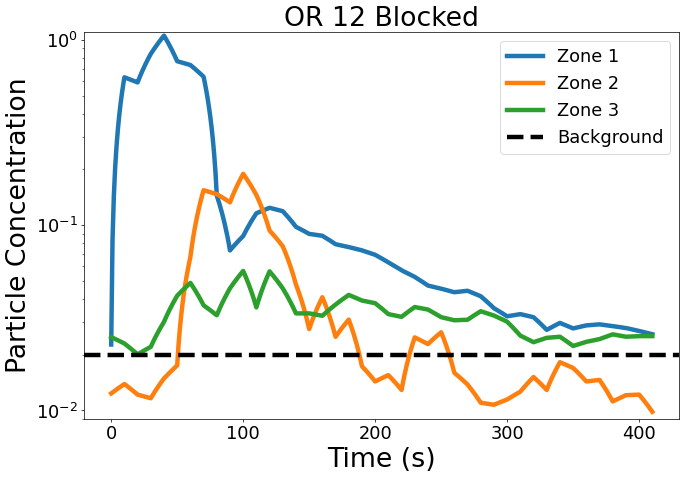

In [16]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR12B['Time'], OR12B['Zone 1']/(100*37), linewidth=5.0)
plt.semilogy(OR12B['Time'], OR12B['Zone 2']/(100*37), linewidth=5.0)
plt.semilogy(OR12B['Time'], OR12B['Zone 3']/(100*37), linewidth=5.0)
plt.title('OR 12 Blocked').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.009, 1.1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.02, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# # Compute the area using the composite Simpson's rule.
# Zone_1 = simps(HMC1['Zone 1']/(100*110) - 0.0065, dx=0.01)
# #print("area 1 =", area_1)

# Zone_2 = simps(HMC1['Zone 2']/(100*110) - 0.0065, dx=0.01)
# #print("area 2 =", area_2)

# Zone_3 = simps(HMC1['Zone 3']/(100*110) - 0.0065, dx=0.01)
# #print("area 3 =", area_3)




# inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
# #print("Inside =", inside)

# door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
# #print("Door Sensors =", door_sensors)

# nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
# #print("Nurse's Station =", nurses_station)

# total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
# #print("Total Average =", total_average)

# print("Inside =", inside/total_average)
# print("Door Sensors =", door_sensors/total_average)
# print("Nurse's Station =", nurses_station/total_average)
# print("Outside =", Zone_3/total_average)

[-0.00459887 -2.0408112 ]


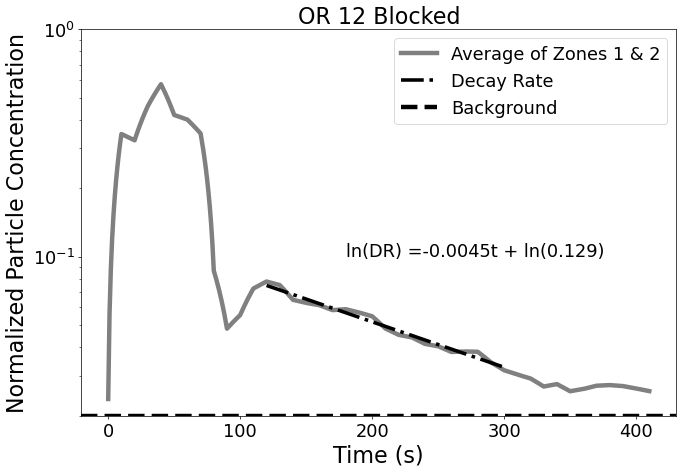

In [17]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR12B['Time'], OR12B['Indoor Average']/(100*37), linewidth = 5, color='gray', linestyle = '-')
plt.title('OR 12 Blocked').set_size(25)
plt.xlabel('Time (s)').set_size(25)
plt.ylabel('Normalized Particle Concentration').set_size(25)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.02, 1])

log_y_data = np.log(OR12B['Indoor Average']/(100*37))

time = OR5UB['Time'][120:300]
y_data = log_y_data[120:300]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)
(t,yd) = (curve_fit)
t_text = str(truncate(t,4))
yd_text = str(truncate(math.exp(yd),3))


y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.02, color='black', linestyle='--', linewidth=5.0)

text = ('ln(DR) =' + t_text + 't' + ' + ' +  'ln(' + yd_text + ')')

plt.text(180, 0.1, text, fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

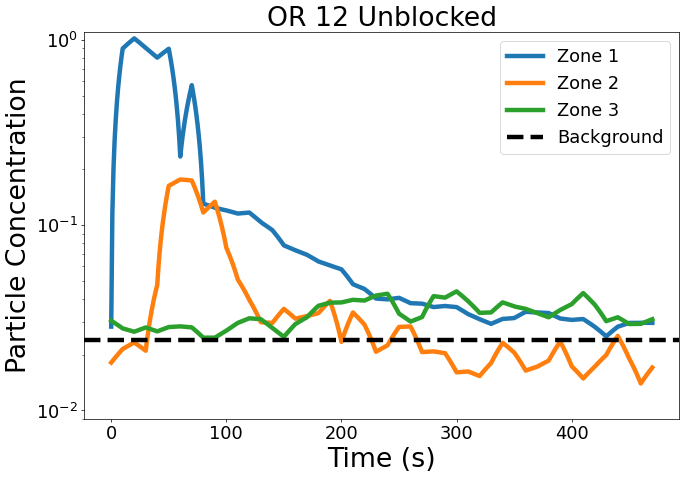

In [18]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR12UB['Time'], OR12UB['Zone 1']/(100*37), linewidth=5.0)
plt.semilogy(OR12UB['Time'], OR12UB['Zone 2']/(100*37), linewidth=5.0)
plt.semilogy(OR12UB['Time'], OR12UB['Zone 3']/(100*37), linewidth=5.0)
plt.title('OR 12 Unblocked').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.009, 1.1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.024, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# # Compute the area using the composite Simpson's rule.
# Zone_1 = simps(HMC1['Zone 1']/(100*110) - 0.0065, dx=0.01)
# #print("area 1 =", area_1)

# Zone_2 = simps(HMC1['Zone 2']/(100*110) - 0.0065, dx=0.01)
# #print("area 2 =", area_2)

# Zone_3 = simps(HMC1['Zone 3']/(100*110) - 0.0065, dx=0.01)
# #print("area 3 =", area_3)




# inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
# #print("Inside =", inside)

# door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
# #print("Door Sensors =", door_sensors)

# nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
# #print("Nurse's Station =", nurses_station)

# total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
# #print("Total Average =", total_average)

# print("Inside =", inside/total_average)
# print("Door Sensors =", door_sensors/total_average)
# print("Nurse's Station =", nurses_station/total_average)
# print("Outside =", Zone_3/total_average)

[-0.00549349 -1.81061084]


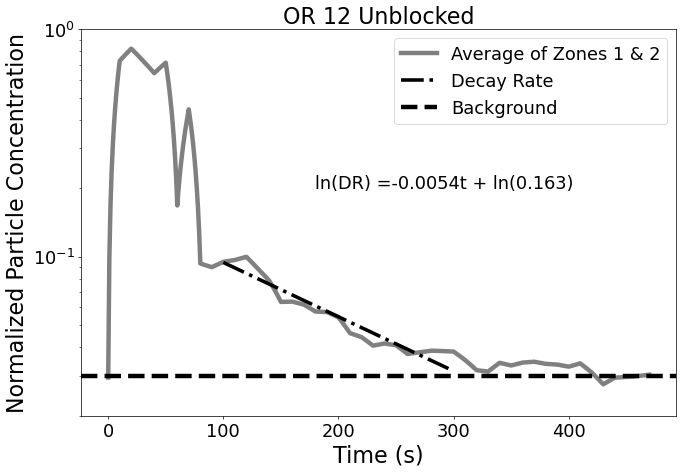

In [19]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR12UB['Time'], OR12UB['Indoor Average']/(100*37), linewidth = 5, color='gray', linestyle = '-')
plt.title('OR 12 Unblocked').set_size(25)
plt.xlabel('Time (s)').set_size(25)
plt.ylabel('Normalized Particle Concentration').set_size(25)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.02, 1])

log_y_data = np.log(OR12UB['Indoor Average']/(100*37))

time = OR12UB['Time'][100:300]
y_data = log_y_data[100:300]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)
(t,yd) = (curve_fit)
t_text = str(truncate(t,4))
yd_text = str(truncate(math.exp(yd),3))


y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.03, color='black', linestyle='--', linewidth=5.0)

text = ('ln(DR) =' + t_text + 't' + ' + ' +  'ln(' + yd_text + ')')

plt.text(180, 0.2, text, fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

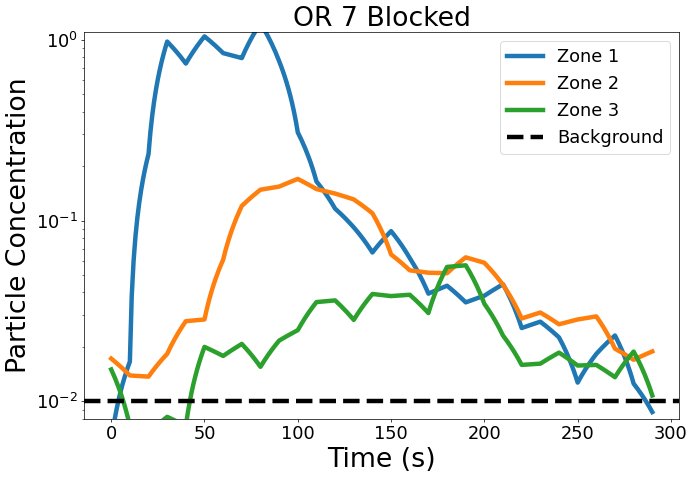

In [20]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR7B['Time'], OR7B['Zone 1']/(100*13), linewidth=5.0)
plt.semilogy(OR7B['Time'], OR7B['Zone 2']/(100*13), linewidth=5.0)
plt.semilogy(OR7B['Time'], OR7B['Zone 3']/(100*13), linewidth=5.0)
plt.title('OR 7 Blocked').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.008, 1.1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.01, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# # Compute the area using the composite Simpson's rule.
# Zone_1 = simps(HMC1['Zone 1']/(100*110) - 0.0065, dx=0.01)
# #print("area 1 =", area_1)

# Zone_2 = simps(HMC1['Zone 2']/(100*110) - 0.0065, dx=0.01)
# #print("area 2 =", area_2)

# Zone_3 = simps(HMC1['Zone 3']/(100*110) - 0.0065, dx=0.01)
# #print("area 3 =", area_3)




# inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
# #print("Inside =", inside)

# door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
# #print("Door Sensors =", door_sensors)

# nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
# #print("Nurse's Station =", nurses_station)

# total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
# #print("Total Average =", total_average)

# print("Inside =", inside/total_average)
# print("Door Sensors =", door_sensors/total_average)
# print("Nurse's Station =", nurses_station/total_average)
# print("Outside =", Zone_3/total_average)

[-0.01243546 -0.77235679]


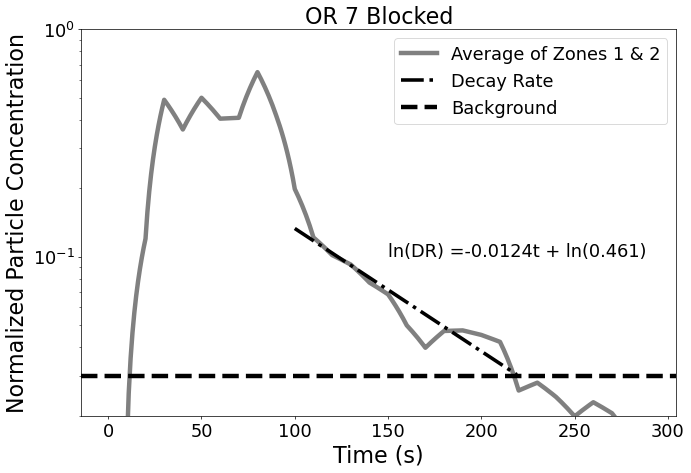

In [31]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR7B['Time'], OR7B['Indoor Average']/(100*13), linewidth = 5, color='gray', linestyle = '-')
plt.title('OR 7 Blocked').set_size(25)
plt.xlabel('Time (s)').set_size(25)
plt.ylabel('Normalized Particle Concentration').set_size(25)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.02, 1])

log_y_data = np.log(OR7B['Indoor Average']/(100*13))

time = OR7B['Time'][100:220]
y_data = log_y_data[100:220]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)
(t,yd) = (curve_fit)
t_text = str(truncate(t,4))
yd_text = str(truncate(math.exp(yd),3))


y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.03, color='black', linestyle='--', linewidth=5.0)

text = ('ln(DR) =' + t_text + 't' + ' + ' +  'ln(' + yd_text + ')')

plt.text(150, 0.1, text, fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

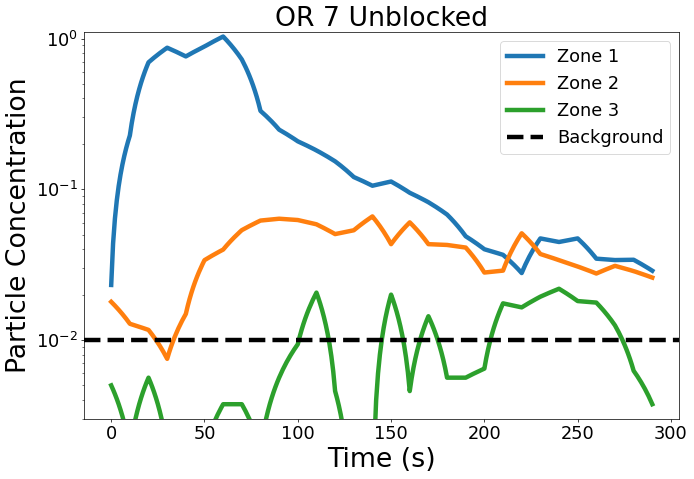

In [22]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR7UB['Time'], OR7UB['Zone 1']/(100*8), linewidth=5.0)
plt.semilogy(OR7UB['Time'], OR7UB['Zone 2']/(100*8), linewidth=5.0)
plt.semilogy(OR7UB['Time'], OR7UB['Zone 3']/(100*8), linewidth=5.0)
plt.title('OR 7 Unblocked').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1.1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.01, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# # Compute the area using the composite Simpson's rule.
# Zone_1 = simps(HMC1['Zone 1']/(100*110) - 0.0065, dx=0.01)
# #print("area 1 =", area_1)

# Zone_2 = simps(HMC1['Zone 2']/(100*110) - 0.0065, dx=0.01)
# #print("area 2 =", area_2)

# Zone_3 = simps(HMC1['Zone 3']/(100*110) - 0.0065, dx=0.01)
# #print("area 3 =", area_3)




# inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
# #print("Inside =", inside)

# door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
# #print("Door Sensors =", door_sensors)

# nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
# #print("Nurse's Station =", nurses_station)

# total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
# #print("Total Average =", total_average)

# print("Inside =", inside/total_average)
# print("Door Sensors =", door_sensors/total_average)
# print("Nurse's Station =", nurses_station/total_average)
# print("Outside =", Zone_3/total_average)

[-0.0127154  -0.58703091]


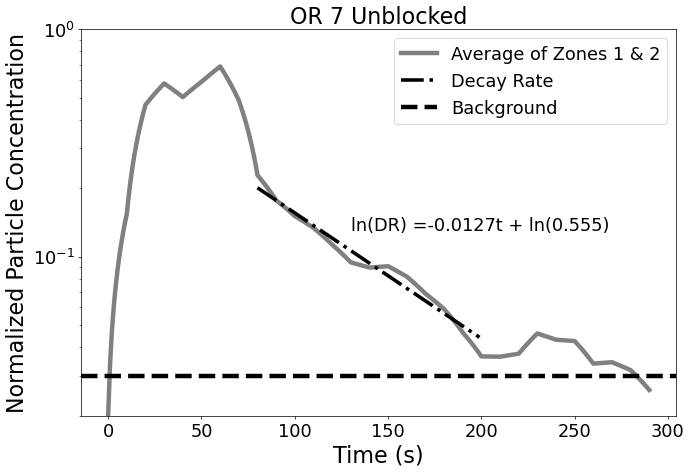

In [33]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR7UB['Time'], OR7UB['Indoor Average']/(100*8), linewidth = 5, color='gray', linestyle = '-')
plt.title('OR 7 Unblocked').set_size(25)
plt.xlabel('Time (s)').set_size(25)
plt.ylabel('Normalized Particle Concentration').set_size(25)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.02, 1])

log_y_data = np.log(OR7UB['Indoor Average']/(100*8))

time = OR7UB['Time'][80:200]
y_data = log_y_data[80:200]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)
(t,yd) = (curve_fit)
t_text = str(truncate(t,4))
yd_text = str(truncate(math.exp(yd),3))


y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.03, color='black', linestyle='--', linewidth=5.0)

text = ('ln(DR) =' + t_text + 't' + ' + ' +  'ln(' + yd_text + ')')

plt.text(130, 0.13, text, fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

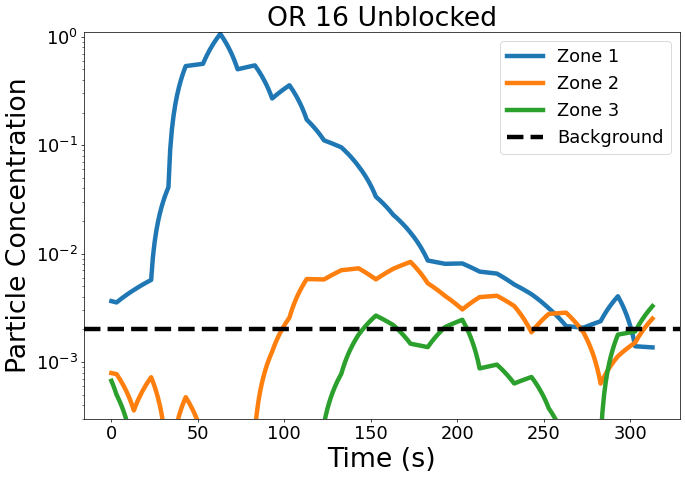

In [24]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR16UB['Time'], OR16UB['Zone 1']/(100*80), linewidth=5.0)
plt.semilogy(OR16UB['Time'], OR16UB['Zone 2']/(100*80), linewidth=5.0)
plt.semilogy(OR16UB['Time'], OR16UB['Zone 3']/(100*80), linewidth=5.0)
plt.title('OR 16 Unblocked').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.0003, 1.1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.002, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# # Compute the area using the composite Simpson's rule.
# Zone_1 = simps(HMC1['Zone 1']/(100*110) - 0.0065, dx=0.01)
# #print("area 1 =", area_1)

# Zone_2 = simps(HMC1['Zone 2']/(100*110) - 0.0065, dx=0.01)
# #print("area 2 =", area_2)

# Zone_3 = simps(HMC1['Zone 3']/(100*110) - 0.0065, dx=0.01)
# #print("area 3 =", area_3)




# inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
# #print("Inside =", inside)

# door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
# #print("Door Sensors =", door_sensors)

# nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
# #print("Nurse's Station =", nurses_station)

# total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
# #print("Total Average =", total_average)

# print("Inside =", inside/total_average)
# print("Door Sensors =", door_sensors/total_average)
# print("Nurse's Station =", nurses_station/total_average)
# print("Outside =", Zone_3/total_average)

[-0.02740355  0.44541643]


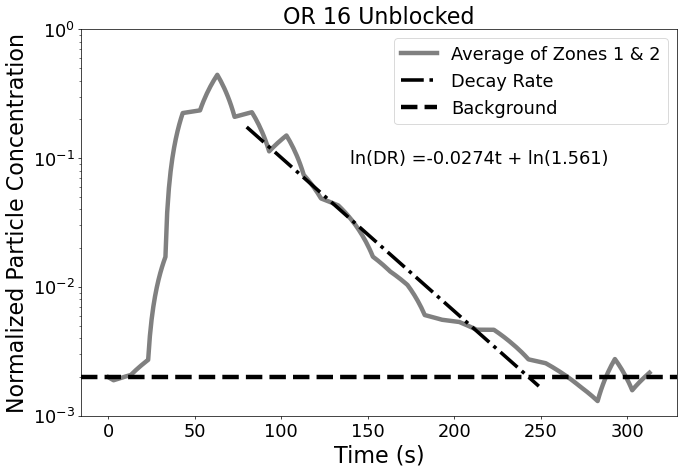

In [34]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR16UB['Time'], OR16UB['Indoor Average']/(100*80), linewidth = 5, color='gray', linestyle = '-')
plt.title('OR 16 Unblocked').set_size(25)
plt.xlabel('Time (s)').set_size(25)
plt.ylabel('Normalized Particle Concentration').set_size(25)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.001, 1])

log_y_data = np.log(OR16UB['Indoor Average']/(100*80))

time = OR16UB['Time'][80:250]
y_data = log_y_data[80:250]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)
(t,yd) = (curve_fit)
t_text = str(truncate(t,4))
yd_text = str(truncate(math.exp(yd),3))


y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.002, color='black', linestyle='--', linewidth=5.0)

text = ('ln(DR) =' + t_text + 't' + ' + ' +  'ln(' + yd_text + ')')

plt.text(140, 0.09, text, fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

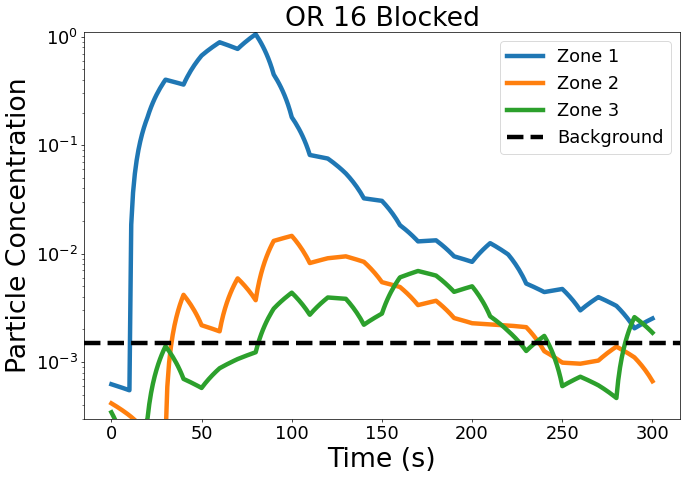

In [26]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR16B1['Time'], OR16B1['Zone 1']/(100*100), linewidth=5.0)
plt.semilogy(OR16B1['Time'], OR16B1['Zone 2']/(100*100), linewidth=5.0)
plt.semilogy(OR16B1['Time'], OR16B1['Zone 3']/(100*100), linewidth=5.0)
plt.title('OR 16 Blocked').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.0003, 1.1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0015, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# # Compute the area using the composite Simpson's rule.
# Zone_1 = simps(HMC1['Zone 1']/(100*110) - 0.0065, dx=0.01)
# #print("area 1 =", area_1)

# Zone_2 = simps(HMC1['Zone 2']/(100*110) - 0.0065, dx=0.01)
# #print("area 2 =", area_2)

# Zone_3 = simps(HMC1['Zone 3']/(100*110) - 0.0065, dx=0.01)
# #print("area 3 =", area_3)




# inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
# #print("Inside =", inside)

# door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
# #print("Door Sensors =", door_sensors)

# nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
# #print("Nurse's Station =", nurses_station)

# total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
# #print("Total Average =", total_average)

# print("Inside =", inside/total_average)
# print("Door Sensors =", door_sensors/total_average)
# print("Nurse's Station =", nurses_station/total_average)
# print("Outside =", Zone_3/total_average)

[-0.01879459 -1.43696052]


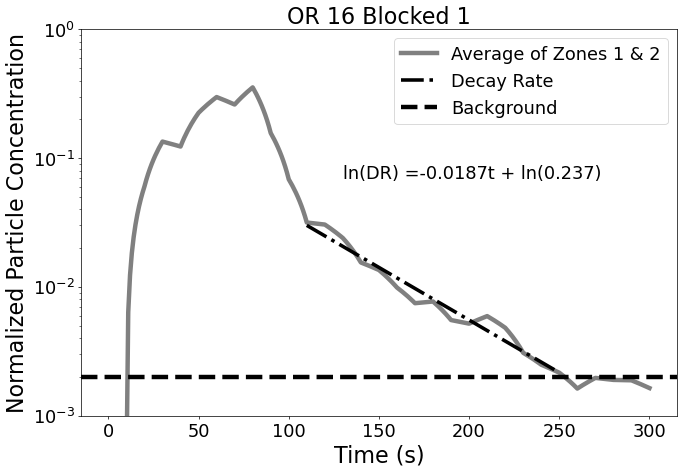

In [35]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR16B1['Time'], OR16B1['Indoor Average']/(100*100), linewidth = 5, color='gray', linestyle = '-')
plt.title('OR 16 Blocked 1').set_size(25)
plt.xlabel('Time (s)').set_size(25)
plt.ylabel('Normalized Particle Concentration').set_size(25)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.001, 1])

log_y_data = np.log(OR16B1['Indoor Average']/(100*100))

time = OR16B1['Time'][110:250]
y_data = log_y_data[110:250]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)
(t,yd) = (curve_fit)
t_text = str(truncate(t,4))
yd_text = str(truncate(math.exp(yd),3))


y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.002, color='black', linestyle='--', linewidth=5.0)

text = ('ln(DR) =' + t_text + 't' + ' + ' +  'ln(' + yd_text + ')')

plt.text(130, 0.07, text, fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

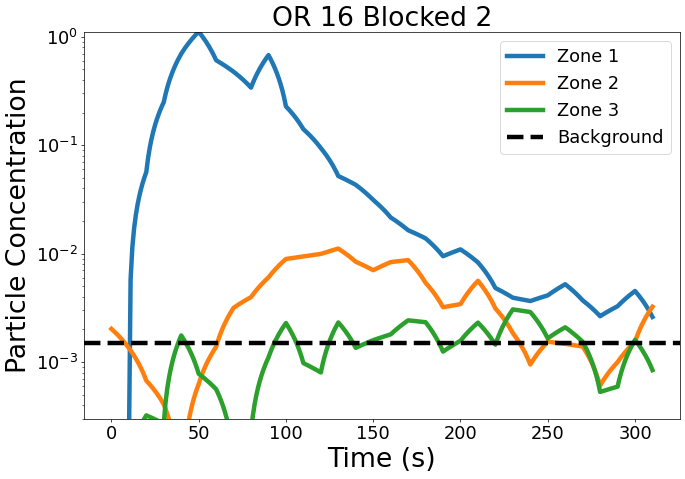

In [28]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR16B2['Time'], OR16B2['Zone 1']/(100*80), linewidth=5.0)
plt.semilogy(OR16B2['Time'], OR16B2['Zone 2']/(100*80), linewidth=5.0)
plt.semilogy(OR16B2['Time'], OR16B2['Zone 3']/(100*80), linewidth=5.0)
plt.title('OR 16 Blocked 2').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.0003, 1.1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0015, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# # Compute the area using the composite Simpson's rule.
# Zone_1 = simps(HMC1['Zone 1']/(100*110) - 0.0065, dx=0.01)
# #print("area 1 =", area_1)

# Zone_2 = simps(HMC1['Zone 2']/(100*110) - 0.0065, dx=0.01)
# #print("area 2 =", area_2)

# Zone_3 = simps(HMC1['Zone 3']/(100*110) - 0.0065, dx=0.01)
# #print("area 3 =", area_3)




# inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
# #print("Inside =", inside)

# door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
# #print("Door Sensors =", door_sensors)

# nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
# #print("Nurse's Station =", nurses_station)

# total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
# #print("Total Average =", total_average)

# print("Inside =", inside/total_average)
# print("Door Sensors =", door_sensors/total_average)
# print("Nurse's Station =", nurses_station/total_average)
# print("Outside =", Zone_3/total_average)

[-0.01868915 -1.21001431]


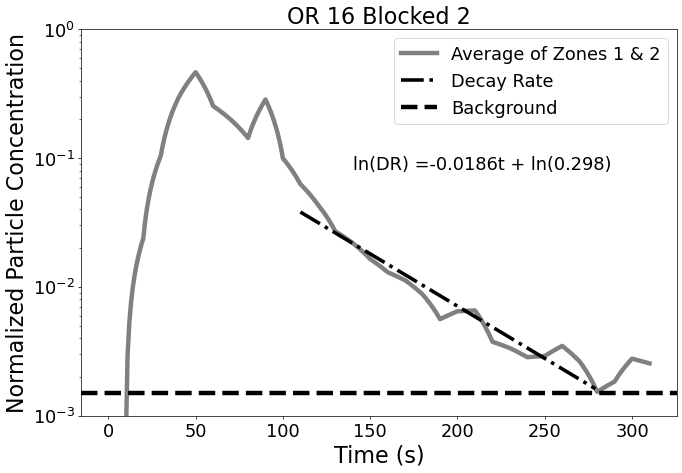

In [36]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(OR16B2['Time'], OR16B2['Indoor Average']/(100*80), linewidth = 5, color='gray', linestyle = '-')
plt.title('OR 16 Blocked 2').set_size(25)
plt.xlabel('Time (s)').set_size(25)
plt.ylabel('Normalized Particle Concentration').set_size(25)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.001, 1])

log_y_data = np.log(OR16B2['Indoor Average']/(100*80))

time = OR16B2['Time'][110:280]
y_data = log_y_data[110:280]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)
(t,yd) = (curve_fit)
t_text = str(truncate(t,4))
yd_text = str(truncate(math.exp(yd),3))


y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.0015, color='black', linestyle='--', linewidth=5.0)

text = ('ln(DR) =' + t_text + 't' + ' + ' +  'ln(' + yd_text + ')')

plt.text(140, 0.082, text, fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})